# Imports

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Loading the Data

## Markdown Cells

In [4]:
md_filepath = 'markdown_group.csv'
md_df = pd.read_csv(md_filepath)

In [5]:
# initial look at the data
md_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,...,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars
0,3,594,True,False,False,False,0.507588,1.000000,0.044444,3.0,...,0.000000,1.000000,1.809524,False,False,0.0,False,7.0,False,10.0
1,6,1222,True,False,False,False,1.000000,0.000000,0.161290,1.0,...,0.961538,1.000000,0.000000,False,False,0.0,False,5.0,False,0.0
2,7,1447,True,False,False,False,0.970851,0.011364,0.375887,1.0,...,0.988636,1.000000,0.000000,False,True,15.0,False,30.0,False,0.0
3,12,2705,True,False,False,False,1.000000,0.500000,0.461538,1.0,...,0.000000,0.923077,1.615385,False,False,6.0,False,7.0,False,0.0
4,15,2861,True,False,False,True,1.000000,0.214286,0.461538,1.0,...,0.000000,1.000000,6.333333,False,False,0.0,False,1.0,False,0.0


In [6]:
# save the original dataframe
md_original = md_df.copy()

In [7]:
# clear the first two columns
md_df = md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [8]:
# check the data again
md_df.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,is_education,...,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars
0,True,False,False,False,0.507588,1.000000,0.044444,3.0,0.0,True,...,0.000000,1.000000,1.809524,False,False,0.0,False,7.0,False,10.0
1,True,False,False,False,1.000000,0.000000,0.161290,1.0,0.0,True,...,0.961538,1.000000,0.000000,False,False,0.0,False,5.0,False,0.0
2,True,False,False,False,0.970851,0.011364,0.375887,1.0,0.0,True,...,0.988636,1.000000,0.000000,False,True,15.0,False,30.0,False,0.0
3,True,False,False,False,1.000000,0.500000,0.461538,1.0,0.0,True,...,0.000000,0.923077,1.615385,False,False,6.0,False,7.0,False,0.0
4,True,False,False,True,1.000000,0.214286,0.461538,1.0,0.0,False,...,0.000000,1.000000,6.333333,False,False,0.0,False,1.0,False,0.0


In [9]:
# extract the column titles
md_vars = list(md_df)
md_vars

['longer_beginning',
 'longer_ending',
 'has_author',
 'has_equation',
 'jupyter_prop',
 'output_cell_prop',
 'markdown_prop',
 'num_contrib',
 'image_prop',
 'is_education',
 'has_links',
 'has_comments',
 'md_frequency',
 'has_title',
 'num_commits',
 'md_format',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'has_error',
 'has_export',
 'num_functions',
 'has_test',
 'num_headers',
 'has_param',
 'num_stars']

## No Markdown Cells

In [10]:
no_md_filepath = 'no_markdown_group.csv'
no_md_df = pd.read_csv(no_md_filepath)

In [11]:
# save the original dataframe
no_md_original = no_md_df.copy()

In [12]:
# clear the first two columns
no_md_df = no_md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [13]:
# initial look at the data
no_md_df.head()

,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,False,0.714130,0.538462,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False,True,2.0,False,False,1.0
1,False,0.997840,0.780488,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True,True,5.0,False,False,1.0
2,False,0.121957,0.461538,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False,True,0.0,False,False,4.0
3,False,1.000000,0.190476,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False,False,1.0,False,False,0.0
4,False,0.940063,0.125000,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True,False,3.0,False,False,0.0


In [14]:
# extract the column titles
no_md_vars = list(no_md_df)
no_md_vars

['has_author',
 'jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'is_education',
 'has_comments',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'has_error',
 'has_export',
 'num_functions',
 'has_test',
 'has_param',
 'num_stars']

# K-Means Clustering

## Adjust the Data

Since k-means clustering is performed on quantitative variables, we change `True` and `False` in the data to `1` and `0`, respectively

In [14]:
# replace True with 1 in both groups
md_adjusted = md_df.replace(True, 1)
no_md_adjusted = no_md_df.replace(True, 1)

In [15]:
# replace False with 0 in both groups
md_adjusted = md_adjusted.replace(False, 0)
no_md_adjusted = no_md_adjusted.replace(False, 0)

In [16]:
# check the markdown cell group
md_adjusted.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,1.0,0.0,0.0,0.0,0.507588,0.044444,3.0,0.0,1.0,1.0,0.0,0.068182,1.0,1.0,1.0,0.000000,1.000000,1.809524,0.0
1,1.0,0.0,0.0,0.0,1.000000,0.161290,1.0,0.0,1.0,1.0,1.0,0.333333,0.0,2.0,1.0,0.961538,1.000000,0.000000,0.0
2,1.0,0.0,0.0,0.0,0.970851,0.375887,1.0,0.0,1.0,1.0,1.0,0.621429,1.0,1.0,1.0,0.988636,1.000000,0.000000,0.0
3,1.0,0.0,0.0,0.0,1.000000,0.461538,1.0,0.0,1.0,1.0,1.0,0.640000,1.0,1.0,0.0,0.000000,0.923077,1.615385,0.0
4,1.0,0.0,0.0,1.0,1.000000,0.461538,1.0,0.0,0.0,0.0,1.0,0.520000,0.0,1.0,0.0,0.000000,1.000000,6.333333,0.0


In [17]:
# check the no markdown cell group
no_md_adjusted.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,0.0,0.714130,1.0,0.142857,0.0,0.0,1.0,0.00000,1.000000,1.000000,0.0
1,0.0,0.997840,1.0,0.187500,0.0,1.0,1.0,0.04878,0.789474,10.631579,1.0
2,0.0,0.121957,5.0,0.000000,0.0,1.0,11.0,0.00000,0.909091,6.181818,0.0
3,0.0,1.000000,1.0,0.000000,0.0,1.0,1.0,0.00000,1.000000,1.631579,0.0
4,0.0,0.940063,3.0,0.000000,0.0,1.0,3.0,0.12500,1.000000,1.000000,1.0


## Markdown Cells

### Standardizing the Data

In [18]:
# normalize all variables
md_stand = md_df.loc[:, md_vars].values
md_stand = StandardScaler().fit_transform(md_stand)

In [19]:
# check that the normalized data has a mean of zero and std of one
print(np.mean(md_stand), np.std(md_stand))

7.602639141268273e-17 1.0


In [20]:
# put the normalized data back into dataframe format
md_stand_df = pd.DataFrame(md_stand, columns = md_vars)

# initial look at the standardized data
md_stand_df.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,0.915797,-0.590961,-0.221343,-0.490296,-1.293088,-1.942050,0.504838,-0.960204,0.856909,1.280391,-2.838192,-1.964232,0.741665,-0.399981,1.082388,-0.410421,0.690767,-0.337021,-0.393367
1,0.915797,-0.590961,-0.221343,-0.490296,0.570932,-1.286070,-0.201473,-0.960204,0.856909,1.280391,0.352337,-0.934795,-1.348317,-0.056390,1.082388,3.185141,0.690767,-0.487356,-0.393367
2,0.915797,-0.590961,-0.221343,-0.490296,0.460589,-0.081313,-0.201473,-0.960204,0.856909,1.280391,0.352337,0.183720,0.741665,-0.399981,1.082388,3.286470,0.690767,-0.487356,-0.393367
3,0.915797,-0.590961,-0.221343,-0.490296,0.570932,0.399542,-0.201473,-0.960204,0.856909,1.280391,0.352337,0.255823,0.741665,-0.399981,-0.923883,-0.410421,0.003778,-0.353150,-0.393367
4,0.915797,-0.590961,-0.221343,2.039586,0.570932,0.399542,-0.201473,-0.960204,-1.166986,-0.781011,0.352337,-0.210071,-1.348317,-0.399981,-0.923883,-0.410421,0.690767,0.038819,-0.393367


### Performing K-Means Clustering

In [21]:
# perform k-means with multiple k to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(md_stand)
    sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph for Optimal k for Markdown Cell Group')

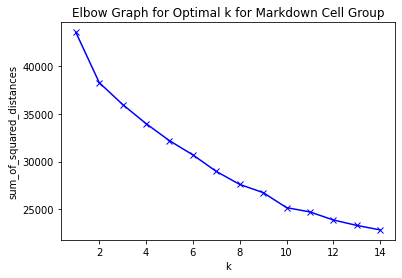

In [22]:
# plot the elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Graph for Optimal k for Markdown Cell Group')

## No Markdown Cells

### Standardizing the Data

In [23]:
# normalize all variables
no_md_stand = no_md_df.loc[:, no_md_vars].values
no_md_stand = StandardScaler().fit_transform(no_md_stand)

In [24]:
# check that the normalized data has a mean of zero and a std of one
print(np.mean(no_md_stand), np.std(no_md_stand))

-3.909057653963651e-17 1.0


In [25]:
# put the normalized features back into dataframe format
no_md_stand_df = pd.DataFrame(no_md_stand, columns = no_md_vars)

# initial look at the standardized data
no_md_stand_df.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,-0.094526,-0.686940,-0.256338,-0.263196,-0.347507,-1.451826,-0.336957,-0.425060,0.525160,-0.371956,-0.435477
1,-0.094526,0.546025,-0.256338,-0.131354,-0.347507,0.688788,-0.336957,-0.233710,-0.681648,0.365723,2.296334
2,-0.094526,-3.260437,1.489081,-0.685091,-0.347507,0.688788,6.280101,-0.425060,0.004038,0.024918,-0.435477
3,-0.094526,0.555410,-0.256338,-0.685091,-0.347507,0.688788,-0.336957,-0.425060,0.525160,-0.323583,-0.435477
4,-0.094526,0.294933,0.616371,-0.685091,-0.347507,0.688788,0.986454,0.065274,0.525160,-0.371956,2.296334


### Performing K-Means Clustering

In [26]:
# we perform k-means with multiple k to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(no_md_stand)
    sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph for Optimal k for No Markdown Cell Group')

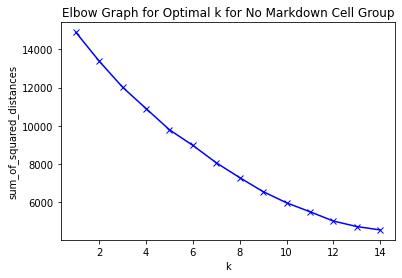

In [27]:
# plot the elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Graph for Optimal k for No Markdown Cell Group')

# K-Prototypes Clustering

## Markdown Cells

In [15]:
# check the datatypes so we know the categorical indexes
list(enumerate(zip(list(md_df), md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('output_cell_prop', dtype('float64'))),
 (6, ('markdown_prop', dtype('float64'))),
 (7, ('num_contrib', dtype('float64'))),
 (8, ('image_prop', dtype('float64'))),
 (9, ('is_education', dtype('bool'))),
 (10, ('has_links', dtype('bool'))),
 (11, ('has_comments', dtype('bool'))),
 (12, ('md_frequency', dtype('float64'))),
 (13, ('has_title', dtype('bool'))),
 (14, ('num_commits', dtype('float64'))),
 (15, ('md_format', dtype('bool'))),
 (16, ('non_exec_prop', dtype('float64'))),
 (17, ('exec_inorder', dtype('float64'))),
 (18, ('exec_skips', dtype('float64'))),
 (19, ('has_error', dtype('bool'))),
 (20, ('has_export', dtype('bool'))),
 (21, ('num_functions', dtype('float64'))),
 (22, ('has_test', dtype('bool'))),
 (23, ('num_headers', dtype('float64'))),
 (24, ('has_param', dtype('bo

In [16]:
# perform k-prototypes clustering with multiple k to find the optimal number of clusters
costs_md = []
K = range(1, 5)
for k in K:
    print("clustering with " + str(k) + " clusters")
    kproto = KPrototypes(n_clusters = k, init = 'Cao', verbose = 0)
    clusters = kproto.fit_predict(md_df, categorical = [0, 1, 2, 3, 9, 10, 11, 13, 15, 19, 20, 22, 24])
    costs_md.append(kproto.cost_)

clustering with 1 clusters
clustering with 2 clusters
clustering with 3 clusters
clustering with 4 clusters


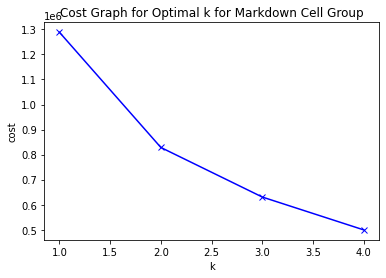

In [17]:
# plot the graph to determine the optimal number of clusters
plt.plot(K, costs_md, 'bx-')
plt.xlabel('k')
plt.ylabel('cost')
plt.title('Cost Graph for Optimal k for Markdown Cell Group')
plt.savefig('figures/4-md-kproto.png')

In [18]:
print(costs_md)

[1288493.3674208932, 828423.8290171237, 630518.8009393245, 499300.5682050256]


The code took a very long time to run on just `[1, 2, 3, 4]` clusters, so we will do more on the remote server.

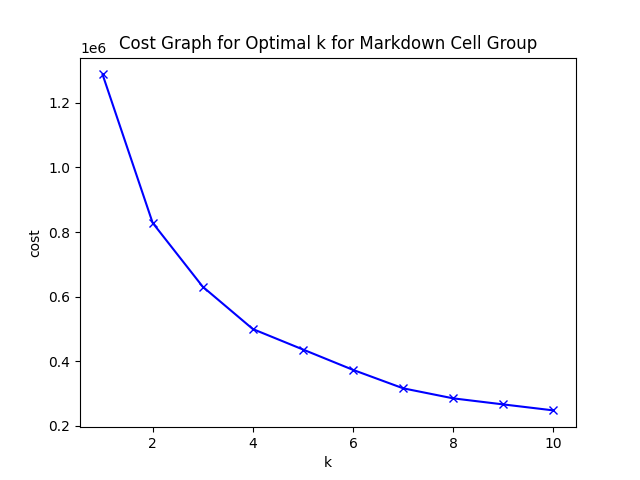

In [23]:
Image('figures/10-markdown-kproto.png')

## No Markdown Cells

In [19]:
# check datatypes
list(enumerate(no_md_df.dtypes))

[(0, dtype('bool')),
 (1, dtype('float64')),
 (2, dtype('float64')),
 (3, dtype('float64')),
 (4, dtype('float64')),
 (5, dtype('bool')),
 (6, dtype('bool')),
 (7, dtype('float64')),
 (8, dtype('float64')),
 (9, dtype('float64')),
 (10, dtype('float64')),
 (11, dtype('bool')),
 (12, dtype('bool')),
 (13, dtype('float64')),
 (14, dtype('bool')),
 (15, dtype('bool')),
 (16, dtype('float64'))]

In [20]:
# perform k-prototypes clustering with multiple k to find the optimal number of clusters
costs_no_md = []
K = range(1, 5)
for k in K:
    print("clustering with " + str(k) + " clusters")
    kproto = KPrototypes(n_clusters = k, init = 'Cao', verbose = 0)
    clusters = kproto.fit_predict(no_md_df, categorical = [0, 5, 6, 11, 12, 14, 15])
    costs_no_md.append(kproto.cost_)

clustering with 1 clusters
clustering with 2 clusters
clustering with 3 clusters
clustering with 4 clusters


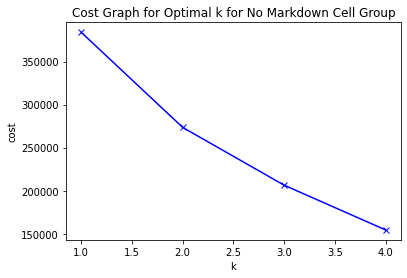

In [21]:
# plot the graph to determine the optimal number of clusters
plt.plot(K, costs_no_md, 'bx-')
plt.xlabel('k')
plt.ylabel('cost')
plt.title('Cost Graph for Optimal k for No Markdown Cell Group')
plt.savefig('figures/4-no-md-kproto.png')

In [22]:
print(costs_no_md)

[384070.37773685425, 273558.6099496511, 206399.56861085643, 154399.9008915852]


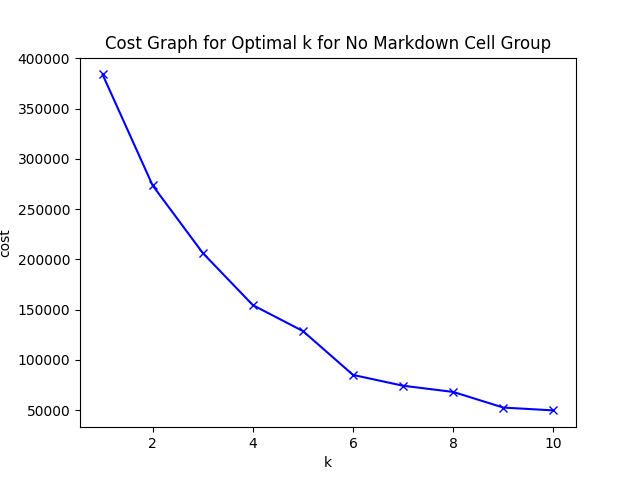

In [24]:
Image('figures/10-no-markdown-kproto.png')

After adding on the features from the tenth run, this graph becomes a lot smoother :)

# Extracting Clusters 

## Centroids

### Markdown Cells

In [26]:
# run the kproto algorithm on the optimal number of clusters
md_kproto = KPrototypes(n_clusters = 4, init = 'Cao', verbose = 0)
md_clusters = md_kproto.fit_predict(md_df, categorical = [0, 1, 2, 3, 9, 10, 11, 13, 15, 19, 20, 22, 24])

In [27]:
# get the cluster centroids
md_cluster_centroids = md_kproto.cluster_centroids_
print(md_cluster_centroids)

[array([[8.50618412e-01, 6.15759093e-01, 3.14513672e-01, 1.38053097e+00,
        4.02037558e-01, 4.71739905e-01, 2.93805310e+00, 4.29004336e-02,
        7.50757616e-01, 4.65783944e+01, 7.42477876e+00, 8.26548673e+00,
        2.27433628e+00],
       [6.77838783e-01, 3.03019738e-01, 3.48968324e-01, 7.08000000e+00,
        6.99682540e-02, 5.07850663e-01, 5.24000000e+00, 4.79074831e-01,
        9.58967529e-01, 6.61091664e+00, 2.16000000e+00, 1.02400000e+01,
        1.37720000e+02],
       [7.76546827e-01, 5.54924584e-01, 4.98487996e-01, 1.84412470e+00,
        2.58201506e-01, 6.06005996e-01, 3.02637890e+00, 1.51067047e-01,
        9.41026101e-01, 4.10847044e+00, 1.06330935e+01, 2.29688249e+01,
        7.12230216e-01],
       [8.68999507e-01, 5.37091483e-01, 3.69933606e-01, 1.43778802e+00,
        2.92366653e-01, 5.74063295e-01, 1.86232719e+00, 9.88663369e-02,
        9.28906910e-01, 3.62749877e+00, 3.92281106e+00, 4.56739631e+00,
        1.69239631e+00]]), array([[False, False, False, Fals

For the four clusters, the data is separated into quantitative and categorical, so we will organize it as such

In [28]:
# extract arrays for quantitative and categorical
md_quant_centroids = md_cluster_centroids[0]
md_cat_centroids = md_cluster_centroids[1]

In [29]:
# look at the variables so we can separate into quantitative and categorical
list(enumerate(zip(md_vars, md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('output_cell_prop', dtype('float64'))),
 (6, ('markdown_prop', dtype('float64'))),
 (7, ('num_contrib', dtype('float64'))),
 (8, ('image_prop', dtype('float64'))),
 (9, ('is_education', dtype('bool'))),
 (10, ('has_links', dtype('bool'))),
 (11, ('has_comments', dtype('bool'))),
 (12, ('md_frequency', dtype('float64'))),
 (13, ('has_title', dtype('bool'))),
 (14, ('num_commits', dtype('float64'))),
 (15, ('md_format', dtype('bool'))),
 (16, ('non_exec_prop', dtype('float64'))),
 (17, ('exec_inorder', dtype('float64'))),
 (18, ('exec_skips', dtype('float64'))),
 (19, ('has_error', dtype('bool'))),
 (20, ('has_export', dtype('bool'))),
 (21, ('num_functions', dtype('float64'))),
 (22, ('has_test', dtype('bool'))),
 (23, ('num_headers', dtype('float64'))),
 (24, ('has_param', dtype('bo

In [30]:
# extract quant and cat
md_quant_vars = [md_vars[i] for i in [4, 5, 6, 7, 8, 12, 14, 16, 17, 18, 21, 23, 25]]
md_cat_vars = [md_vars[i] for i in [0, 1, 2, 3, 9, 10, 11, 13, 15, 19, 20, 22, 24]]

We want to extract cluster information into a dataframe

In [31]:
# dictionary of information to write to csv
md_centroids_cols = {
    'cluster': None,
    'longer_beginning': None,
    'longer_ending': None,
    'has_author': None,
    'has_equation': None,
    'jupyter_prop': None,
    'output_cell_prop': None,
    'markdown_prop': None,
    'num_contrib': None,
    'image_prop': None,
    'is_education': None,
    'has_links': None,
    'has_comments': None,
    'md_frequency': None,
    'has_title': None,
    'num_commits': None,
    'md_format': None,
    'non_exec_prop': None,
    'exec_inorder': None,
    'exec_skips': None,
    'has_error': None,
    'has_export': None,
    'num_functions': None,
    'has_test': None,
    'num_headers': None,
    'has_param': None,
    'num_stars': None
}

In [32]:
# for each cluster, put the information in the dictionary above
md_clusters = [md_centroids_cols.copy() for i in range(4)]
for i in range(4):
    
    # set the cluster number
    md_clusters[i]['cluster'] = i + 1
    
    # get the corresponding centroid data from the arrays
    quant_centroid = md_quant_centroids[i]
    cat_centroid = md_cat_centroids[i]
    
    # for each variable, write the data to the dictionary
    for (j, var) in enumerate(md_quant_vars):
        md_clusters[i][var] = quant_centroid[j]
    for (j, var) in enumerate(md_cat_vars):
        md_clusters[i][var] = cat_centroid[j]

In [33]:
# write the data to a dataframe
md_clusters_df = pd.DataFrame(md_clusters)

# initial look at the data
md_clusters_df.head()

,cluster,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,...,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars
0,1,False,False,False,False,0.850618,0.615759,0.314514,1.380531,0.402038,...,0.042900,0.750758,46.578394,False,False,7.424779,False,8.265487,False,2.274336
1,2,True,False,False,False,0.677839,0.303020,0.348968,7.080000,0.069968,...,0.479075,0.958968,6.610917,False,False,2.160000,False,10.240000,False,137.720000
2,3,True,False,False,False,0.776547,0.554925,0.498488,1.844125,0.258202,...,0.151067,0.941026,4.108470,False,False,10.633094,False,22.968825,False,0.712230
3,4,True,False,False,False,0.869000,0.537091,0.369934,1.437788,0.292367,...,0.098866,0.928907,3.627499,False,False,3.922811,False,4.567396,False,1.692396


### No Markdown Cells

In [37]:
# run kproto algorithm
no_md_kproto = KPrototypes(n_clusters = 5, init = 'Cao', verbose = 0)
no_md_clusters = no_md_kproto.fit_predict(no_md_df, categorical = [0, 5, 6, 11, 12, 14, 15])

In [38]:
# get the cluster centroids
no_md_cluster_centroids = no_md_kproto.cluster_centroids_
print(no_md_cluster_centroids)

[array([[8.61326521e-01, 5.36802250e-01, 1.34513274e+00, 2.69010102e-01,
        1.74336283e+00, 2.98303935e-02, 7.91826665e-01, 2.49950740e+01,
        3.60176991e+00, 3.18584071e-01],
       [9.31849925e-01, 4.03277387e-01, 1.39726027e+00, 2.42840842e-01,
        1.68493151e+00, 1.73231236e-01, 8.94414497e-01, 5.03471397e+00,
        2.16164384e+01, 9.45205479e-01],
       [8.70994219e-01, 4.27343296e-01, 1.59333918e+00, 2.25347956e-01,
        1.45048203e+00, 1.13954271e-01, 9.23584942e-01, 2.90492346e+00,
        1.54075372e+00, 7.51971954e-01],
       [8.92346535e-01, 6.01752875e-01, 1.00000000e+00, 2.90747126e-01,
        1.60000000e+00, 3.85013326e-02, 6.72420949e-01, 9.06115885e+01,
        3.33333333e+00, 0.00000000e+00],
       [7.73078414e-01, 7.03642956e-01, 5.25000000e+00, 3.93400390e-01,
        3.75000000e+00, 1.76131703e-02, 9.33186380e-01, 5.82173581e+00,
        1.41666667e+00, 7.57500000e+01]]), array([[False, False,  True, False, False, False, False],
       [False,

In [39]:
# extract arrays for quant and cat
no_md_quant_centroids = no_md_cluster_centroids[0]
no_md_cat_centroids = no_md_cluster_centroids[1]

In [40]:
# look at the variables so we can separate
list(enumerate(zip(no_md_vars, no_md_df.dtypes)))

[(0, ('has_author', dtype('bool'))),
 (1, ('jupyter_prop', dtype('float64'))),
 (2, ('output_cell_prop', dtype('float64'))),
 (3, ('num_contrib', dtype('float64'))),
 (4, ('image_prop', dtype('float64'))),
 (5, ('is_education', dtype('bool'))),
 (6, ('has_comments', dtype('bool'))),
 (7, ('num_commits', dtype('float64'))),
 (8, ('non_exec_prop', dtype('float64'))),
 (9, ('exec_inorder', dtype('float64'))),
 (10, ('exec_skips', dtype('float64'))),
 (11, ('has_error', dtype('bool'))),
 (12, ('has_export', dtype('bool'))),
 (13, ('num_functions', dtype('float64'))),
 (14, ('has_test', dtype('bool'))),
 (15, ('has_param', dtype('bool'))),
 (16, ('num_stars', dtype('float64')))]

In [41]:
# extract quant and cat vars
no_md_quant_vars = [no_md_vars[i] for i in [1, 2, 3, 4, 7, 8, 9, 10, 13, 16]]
no_md_cat_vars = [no_md_vars[i] for i in [0, 5, 6, 11, 12, 14, 15]]

In [42]:
# dictionary of information to write to csv
no_md_centroid_cols = {
    'cluster': None,
    'has_author': None,
    'jupyter_prop': None,
    'output_cell_prop': None,
    'num_contrib': None,
    'image_prop': None,
    'is_education': None,
    'has_comments': None,
    'num_commits': None,
    'non_exec_prop': None,
    'exec_inorder': None,
    'exec_skips': None,
    'has_error': None,
    'has_export': None,
    'num_functions': None,
    'has_test': None,
    'has_param': None,
    'num_stars': None
}

In [59]:
# for each cluster, put information into dict
no_md_clusters = [no_md_centroid_cols.copy() for i in range(5)]
for i in range(5):
    
    # set the cluster number
    no_md_clusters[i]['cluster'] = i + 1
    
    # get corresponding centroid data
    quant_centroid = no_md_quant_centroids[i]
    cat_centroid = no_md_cat_centroids[i]
    
    # for each variable, write data to dict
    for (j, var) in enumerate(no_md_quant_vars):
        no_md_clusters[i][var] = quant_centroid[j]
    for (j, var) in enumerate(no_md_cat_vars):
        no_md_clusters[i][var] = cat_centroid[j]

In [60]:
# write data to dataframe
no_md_clusters_df = pd.DataFrame(no_md_clusters)

# initial look at the data
no_md_clusters_df.head()

,cluster,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,1,False,0.861327,0.536802,1.345133,0.269010,False,True,1.743363,0.029830,0.791827,24.995074,False,False,3.601770,False,False,0.318584
1,2,False,0.931850,0.403277,1.397260,0.242841,False,True,1.684932,0.173231,0.894414,5.034714,False,True,21.616438,False,False,0.945205
2,3,False,0.870994,0.427343,1.593339,0.225348,False,True,1.450482,0.113954,0.923585,2.904923,False,False,1.540754,False,False,0.751972
3,4,False,0.892347,0.601753,1.000000,0.290747,False,True,1.600000,0.038501,0.672421,90.611588,False,False,3.333333,False,False,0.000000
4,5,False,0.773078,0.703643,5.250000,0.393400,False,True,3.750000,0.017613,0.933186,5.821736,False,False,1.416667,False,False,75.750000


## Notebook Labels

We want to create a dataframe (then output to csv) each notebook with its corresponding cluster

### Markdown Cells

In [45]:
# get the labels from the algorithm result
md_labels = md_kproto.labels_

In [46]:
# get the original dataframe and drop the first column
md_labels_df = md_original.copy().drop(['Unnamed: 0'], axis = 1)

# check the dataframe
md_labels_df.head()

,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,...,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars
0,594,True,False,False,False,0.507588,1.000000,0.044444,3.0,0.0,...,0.000000,1.000000,1.809524,False,False,0.0,False,7.0,False,10.0
1,1222,True,False,False,False,1.000000,0.000000,0.161290,1.0,0.0,...,0.961538,1.000000,0.000000,False,False,0.0,False,5.0,False,0.0
2,1447,True,False,False,False,0.970851,0.011364,0.375887,1.0,0.0,...,0.988636,1.000000,0.000000,False,True,15.0,False,30.0,False,0.0
3,2705,True,False,False,False,1.000000,0.500000,0.461538,1.0,0.0,...,0.000000,0.923077,1.615385,False,False,6.0,False,7.0,False,0.0
4,2861,True,False,False,True,1.000000,0.214286,0.461538,1.0,0.0,...,0.000000,1.000000,6.333333,False,False,0.0,False,1.0,False,0.0


In [47]:
# add a column to the dataframe with the labels
md_labels_df['cluster'] = md_labels.tolist()

In [48]:
# initial look at the data
md_labels_df.head()

,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,...,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars,cluster
0,594,True,False,False,False,0.507588,1.000000,0.044444,3.0,0.0,...,1.000000,1.809524,False,False,0.0,False,7.0,False,10.0,3
1,1222,True,False,False,False,1.000000,0.000000,0.161290,1.0,0.0,...,1.000000,0.000000,False,False,0.0,False,5.0,False,0.0,3
2,1447,True,False,False,False,0.970851,0.011364,0.375887,1.0,0.0,...,1.000000,0.000000,False,True,15.0,False,30.0,False,0.0,2
3,2705,True,False,False,False,1.000000,0.500000,0.461538,1.0,0.0,...,0.923077,1.615385,False,False,6.0,False,7.0,False,0.0,3
4,2861,True,False,False,True,1.000000,0.214286,0.461538,1.0,0.0,...,1.000000,6.333333,False,False,0.0,False,1.0,False,0.0,3


In [49]:
# look at value counts for each cluster
md_labels_df['cluster'].value_counts()

3    1736
2     417
0     113
1      25
Name: cluster, dtype: int64

In [50]:
# extract labels to a csv
md_labels_df.to_csv('cluster-data/markdown_group_clusters.csv')

### No Markdown Cells

In [61]:
# get labels from alg result
no_md_labels = no_md_kproto.labels_

In [62]:
# get original dataframe and drop first column
no_md_labels_df = no_md_original.copy().drop(['Unnamed: 0'], axis = 1)

# check the dataframe
no_md_labels_df.head()

,nb_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,1589,False,0.714130,0.538462,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False,True,2.0,False,False,1.0
1,1919,False,0.997840,0.780488,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True,True,5.0,False,False,1.0
2,2857,False,0.121957,0.461538,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False,True,0.0,False,False,4.0
3,4339,False,1.000000,0.190476,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False,False,1.0,False,False,0.0
4,4659,False,0.940063,0.125000,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True,False,3.0,False,False,0.0


In [63]:
# add a column to hold the labels
no_md_labels_df['cluster'] = no_md_labels.tolist()

In [64]:
# initial look at the data
no_md_labels_df.head()

,nb_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars,cluster
0,1589,False,0.714130,0.538462,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False,True,2.0,False,False,1.0,2
1,1919,False,0.997840,0.780488,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True,True,5.0,False,False,1.0,2
2,2857,False,0.121957,0.461538,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False,True,0.0,False,False,4.0,2
3,4339,False,1.000000,0.190476,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False,False,1.0,False,False,0.0,2
4,4659,False,0.940063,0.125000,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True,False,3.0,False,False,0.0,2


In [65]:
# look at value counts for each cluster
no_md_labels_df['cluster'].value_counts()

2    1141
0     113
1      73
3      15
4      12
Name: cluster, dtype: int64

In [66]:
# extract labels to a csv
no_md_labels_df.to_csv('cluster-data/no_markdown_group_clusters.csv')

# Outliers